In [64]:
"""
 * Generate a grayscale histogram for an image.
 *
 * Usage: python GrayscaleHistogram.py <fiilename>
"""
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
import cv2

from skimage.io import imread_collection, imshow
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from skimage import color
from sklearn.cluster import KMeans
sns.set()
plt.rcParams["axes.grid"] = False

In [66]:
paintings = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/testA/*.jpg')

In [67]:
len(paintings)

121

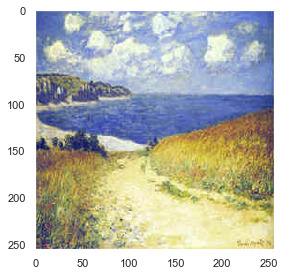

In [68]:
imshow(paintings[0])

In [71]:
generated = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')

In [72]:
len(generated)

751

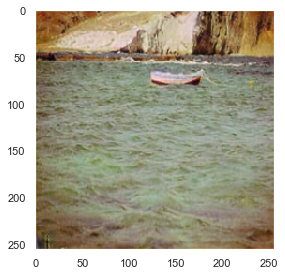

In [73]:
imshow(generated[0])

In [76]:
paint = paintings[:10]
gen = generated[:10]

In [79]:
def color_quantization(original, n_colors=256):
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    
    return less_colors, centers, labels, kmeans.predict(arr), kmeans

In [81]:
mp_pallete = []
for i in tqdm(paint):
    less_colors, centers, labels, clusters, kmeans = color_quantization(i, 50)
    mp_pallete.extend(np.unique((centers.astype(np.int)), axis=-1))

100%|██████████| 10/10 [01:05<00:00,  6.56s/it]


In [82]:
len(mp_pallete)

500

In [88]:
mp_pallete = np.array(mp_pallete)

In [91]:
kmeans = KMeans(n_clusters=mp_pallete.shape[0] , init=mp_pallete, max_iter=1, n_init=1)

In [101]:
paint = np.array(paint)

In [112]:
paint_fit  = paint.reshape((-1, 3))

In [113]:
paint_fit.shape

(655360, 3)

In [114]:
kmeans.fit(paint_fit)

KMeans(init=array([[148, 162, 185],
       [ 94,  87,  89],
       [213, 207, 158],
       ...,
       [127, 185, 158],
       [ 83, 131, 108],
       [ 67,  85, 105]]),
       max_iter=1, n_clusters=500, n_init=1)

In [131]:
paint_predict = paint_fit.reshape((-1, 3))

In [132]:
paint_prediction = kmeans.predict(paint_predict)

In [134]:
gen = np.array(gen)
gen_toPredict = gen.reshape((-1, 3))

In [145]:
generated_prediction = kmeans.predict(gen_toPredict)

In [148]:
generated_prediction.shape

(655360,)

In [149]:
paint_prediction.shape

(655360,)

In [167]:
quantized_imX, binEdges_1 = np.histogram(paint_prediction)
print(quantized_imX)
print(binEdges_1)

[97870 73288 44117 81986 58575 54495 74187 38238 99249 33355]
[  0.   49.9  99.8 149.7 199.6 249.5 299.4 349.3 399.2 449.1 499. ]


In [163]:
quantized_imY, binEdges_2 = np.histogram(generated_prediction)
print(quantized_imY)
print(binEdges_2)

[113755  52381  49868  95846 111110  69210  24733  41388  78091  18978]
[  0.   49.9  99.8 149.7 199.6 249.5 299.4 349.3 399.2 449.1 499. ]


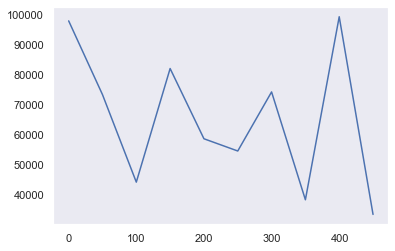

In [171]:
#original paintings
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX)

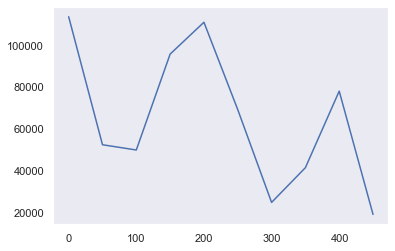

In [170]:
#generated paintings
fig, ax = plt.subplots()
ax.plot(binEdges_2[:-1], quantized_imY)

<Figure size 1440x1440 with 0 Axes>

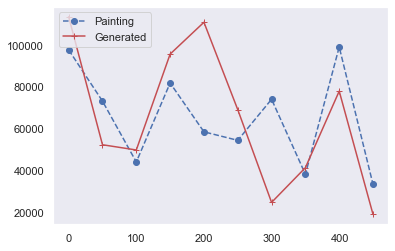

In [178]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges_2[:-1], quantized_imY, c='r',marker="+", ls='-', label='Generated')
plt.legend(loc=2)
plt.draw()